In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/256/0100_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 256
hyperparams.IMG_HEIGHT = 256
hyperparams.EPOCHS = 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mae_nz'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
MODEL_NAME = "0100_1000-256-unet-c"

#DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))


class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import UnetI_H as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8675798185035674961
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5387583488
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15887343631349797701
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 8)  0           conv2d_1[0][0]                   
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [7]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/256/0100_1000/
Noisy files:606
Nitid files:606
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/256/0100_1000/validation/
Noisy files:148
Nitid files:148


In [8]:
##################
# TRAIN MODEL
##################
#import tensorflow as tf
#from tensorflow.compat.v1.keras.backend import set_session
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
#config.log_device_placement = True  # to log device placement (on which device the operation ran)
#sess = tf.compat.v1.Session(config=config)
#set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 500 )

Epoch 1/600
38/38 [==============================] - 13s 153ms/step - loss: 0.0189 - val_loss: 0.0109
Epoch 2/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0095 - val_loss: 0.0104
Epoch 3/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0106 - val_loss: 0.0108
Epoch 4/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 5/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 6/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 7/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0113 - val_loss: 0.0113
Epoch 8/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0113 - val_loss: 0.0113
Epoch 9/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 10/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0114 - val_loss: 0.01

38/38 [==============================] - 4s 99ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 83/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 84/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 85/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 86/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 87/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 88/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 89/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 90/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 91/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epo

38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 163/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 164/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 165/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 166/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 167/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 168/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 169/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 170/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 171/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0

38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 243/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 244/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 245/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 246/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 247/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 248/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 249/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 250/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 251/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0

38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 323/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 324/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 325/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 326/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 327/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 328/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 329/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 330/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 331/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0

38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 403/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 404/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 405/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 406/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 407/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 408/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 409/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 410/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 411/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0

38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 483/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0119
Epoch 484/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 485/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 486/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0119
Epoch 487/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 488/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 489/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0119
Epoch 490/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0.0119
Epoch 491/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0119 - val_loss: 0

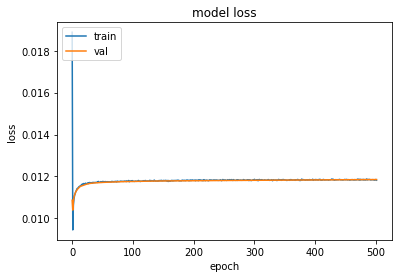

In [9]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [10]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-256-unet-c\assets
